<a href="https://colab.research.google.com/github/zompazompa1957/Machine-Learning-with-Python/blob/master/Copia_di_XGBoostTitanicClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import os
import random
from pathlib import Path
from collections import defaultdict
from itertools import product


import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

%matplotlib inline

# **Load data**

In [ ]:
train_df = pd.read_csv('train_data.csv')
train_df.head(10)

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1
5,5,6,0,1,0.3500,0.016510,0,0,1,0.0,1,0,0,0,0,1,0
6,6,7,0,1,0.6750,0.101229,1,0,0,0.0,1,0,0,0,0,0,1
7,7,8,0,1,0.0250,0.041136,0,0,1,0.4,0,0,1,0,0,0,1
8,8,9,1,0,0.3375,0.021731,0,0,1,0.2,1,0,0,0,0,0,1
9,9,10,1,0,0.1750,0.058694,0,1,0,0.1,1,0,0,0,1,0,0


# **Train the model**

In [ ]:
predictors = ['Age', 'Fare']
outcome = 'Survived'

X = train_df[predictors]
y = train_df[outcome]

xgb = XGBClassifier(objective='binary:logistic', subsample=.63, 
                    use_label_encoder=False, eval_metric='error')
print(xgb.fit(X, y))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.63, use_label_encoder=False,
              verbosity=1)


# **Predict**

In [ ]:
xgb_df = X.copy()
xgb_df['prediction'] = ['Survived' if p == 1 else 'Dead' for p in xgb.predict(X)]
xgb_df['prob_default'] = xgb.predict_proba(X)[:, 0]
xgb_df['Truth'] = ['Survived' if p == 1 else 'Dead' for p in y]
print(xgb_df.head())

      Age      Fare prediction  prob_default     Truth
0  0.2750  0.014151       Dead      0.734515      Dead
1  0.4750  0.139136   Survived      0.496785  Survived
2  0.3250  0.015469       Dead      0.642946  Survived
3  0.4375  0.103644   Survived      0.159827  Survived
4  0.4375  0.015713       Dead      0.871095      Dead


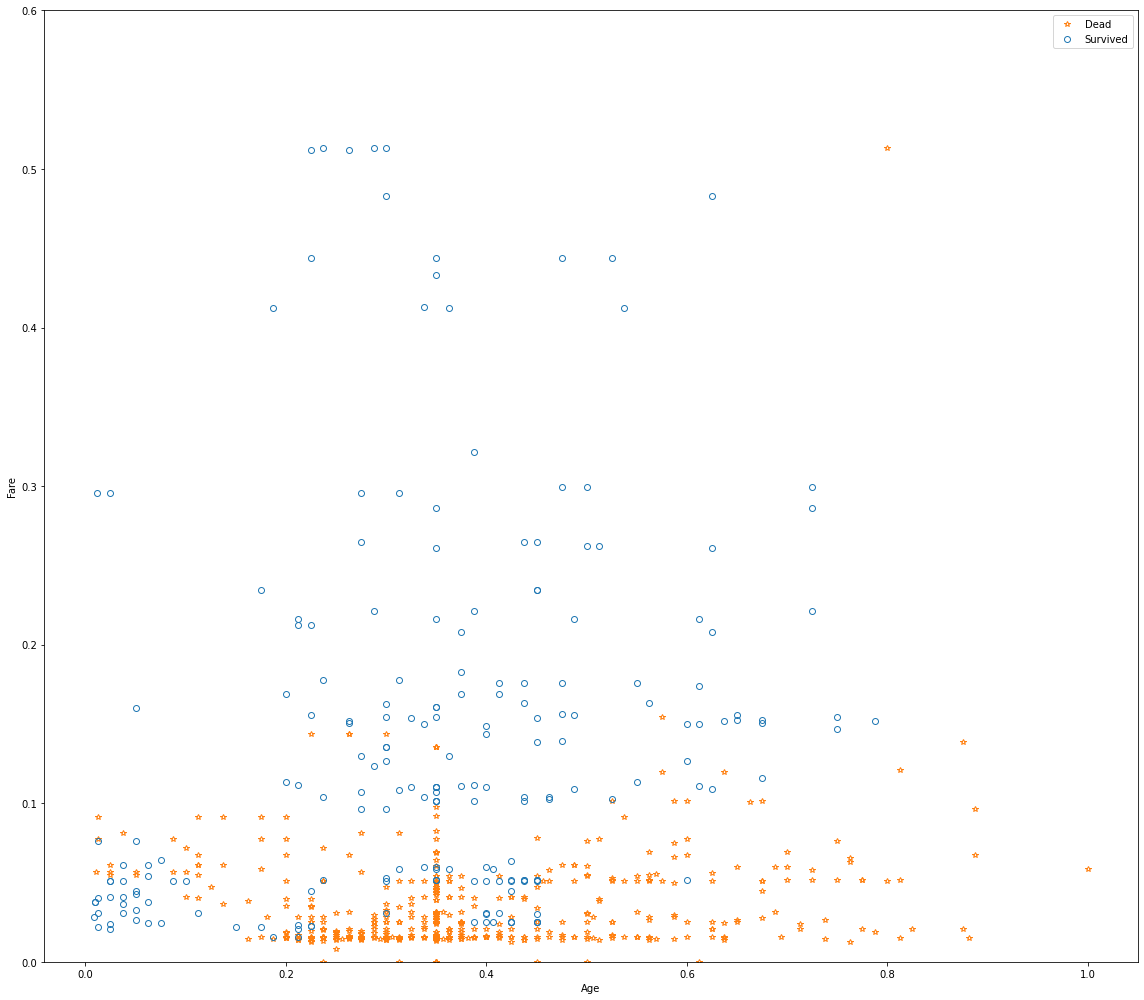

In [ ]:
fig, ax = plt.subplots(figsize=(16, 14))

xgb_df.loc[xgb_df.prediction=='Dead'].plot(
    x='Age', y='Fare', style='*', 
    markerfacecolor='none', markeredgecolor='C1', ax=ax)
xgb_df.loc[xgb_df.prediction=='Survived'].plot(
    x='Age', y='Fare', style='o', 
    markerfacecolor='none', markeredgecolor='C0', ax=ax)
ax.legend(['Dead', 'Survived']);
# ax.set_xlim(0, 1)
ax.set_ylim(0, 0.6)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')

plt.tight_layout()
plt.show()

# **Regularization**

In [ ]:
test_df = pd.read_csv('test_data.csv')

In [ ]:
predictors = ['Sex', 'Age', 'Fare', 'Pclass_1','Pclass_2', 'Pclass_3', 'Family_size', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Emb_1', 'Emb_2', 'Emb_3']
outcome = 'Survived'

train_X = train_df[predictors]
train_y = train_df[outcome]

valid_X = test_df[predictors]
valid_y = test_df[outcome]

xgb_default = XGBClassifier(objective='binary:logistic', n_estimators=250, max_depth=6,
                            reg_lambda=0, learning_rate=0.1, subsample=1,
                            use_label_encoder=False, eval_metric='error')
xgb_default.fit(train_X, train_y)

xgb_penalty = XGBClassifier(objective='binary:logistic', n_estimators=250, max_depth=6,
                            reg_lambda=1000, learning_rate=0.1, subsample=0.63,
                            use_label_encoder=False, eval_metric='error')
print(xgb_penalty.fit(train_X, train_y))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1000, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.63, use_label_encoder=False,
              verbosity=1)


In [ ]:
pred_default = xgb_default.predict_proba(train_X)[:, 1]
error_default = abs(train_y - pred_default) > 0.5
print('Survived (train): ', np.mean(error_default))

pred_default = xgb_default.predict_proba(valid_X)[:, 1]
error_default = abs(valid_y - pred_default) > 0.5
print('default: ', np.mean(error_default))

pred_penalty = xgb_penalty.predict_proba(valid_X)[:, 1]
error_penalty = abs(valid_y - pred_penalty) > 0.5
print('penalty: ', np.mean(error_penalty))

Survived (train):  0.03409090909090909
default:  0.17
penalty:  0.16


In [ ]:
results = []
for ntree_limit in range(1, 250):
    train_default = xgb_default.predict_proba(train_X, ntree_limit=ntree_limit)[:, 1]
    train_penalty = xgb_penalty.predict_proba(train_X, ntree_limit=ntree_limit)[:, 1]
    pred_default = xgb_default.predict_proba(valid_X, ntree_limit=ntree_limit)[:, 1]
    pred_penalty = xgb_penalty.predict_proba(valid_X, ntree_limit=ntree_limit)[:, 1]
    results.append({
        'iterations': ntree_limit,
        'default train': np.mean(abs(train_y - train_default) > 0.5),
        'penalty train': np.mean(abs(train_y - train_penalty) > 0.5),
        'default test': np.mean(abs(valid_y - pred_default) > 0.5),
        'penalty test': np.mean(abs(valid_y - pred_penalty) > 0.5),
    })

results = pd.DataFrame(results)
print(results.head())

   iterations  default train  penalty train  default test  penalty test
0           1       0.145202       0.179293          0.13          0.17
1           2       0.137626       0.183081          0.15          0.16
2           3       0.132576       0.185606          0.15          0.16
3           4       0.127525       0.185606          0.14          0.16
4           5       0.119949       0.185606          0.15          0.16


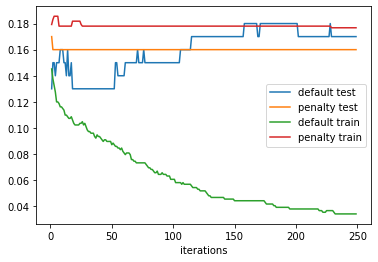

In [ ]:
ax = results.plot(x='iterations', y='default test')
results.plot(x='iterations', y='penalty test', ax=ax)
results.plot(x='iterations', y='default train', ax=ax)
results.plot(x='iterations', y='penalty train', ax=ax)
plt.show()

# **Hyperparameters and Cross-Validation**

In [ ]:
idx = np.random.choice(range(5), size=len(X), replace=True)
error = []
for eta, max_depth in product([0.1, 0.5, 0.9], [3, 6, 9]):
    xgb = XGBClassifier(objective='binary:logistic', n_estimators=250, 
                        max_depth=max_depth, learning_rate=eta,
                        use_label_encoder=False, eval_metric='error')
    cv_error = []
    for k in range(5):
        fold_idx = idx == k
        train_X = X.loc[~fold_idx]; train_y = y[~fold_idx]
        valid_X = X.loc[fold_idx]; valid_y = y[fold_idx]

        xgb.fit(train_X, train_y)
        pred = xgb.predict_proba(valid_X)[:, 1]
        cv_error.append(np.mean(abs(valid_y - pred) > 0.5))
    error.append({
        'eta': eta,
        'max_depth': max_depth,
        'avg_error': np.mean(cv_error)
    })
    print(error[-1])
errors = pd.DataFrame(error)
print(errors)

{'eta': 0.1, 'max_depth': 3, 'avg_error': 0.33443594765777884}
{'eta': 0.1, 'max_depth': 6, 'avg_error': 0.3746657729608958}
{'eta': 0.1, 'max_depth': 9, 'avg_error': 0.3874119403094528}
{'eta': 0.5, 'max_depth': 3, 'avg_error': 0.37680810006967774}
{'eta': 0.5, 'max_depth': 6, 'avg_error': 0.3865615784379047}
{'eta': 0.5, 'max_depth': 9, 'avg_error': 0.3911758296046058}
{'eta': 0.9, 'max_depth': 3, 'avg_error': 0.38250009539599866}
{'eta': 0.9, 'max_depth': 6, 'avg_error': 0.39018686182078344}
{'eta': 0.9, 'max_depth': 9, 'avg_error': 0.3881730946542704}
   eta  max_depth  avg_error
0  0.1          3   0.334436
1  0.1          6   0.374666
2  0.1          9   0.387412
3  0.5          3   0.376808
4  0.5          6   0.386562
5  0.5          9   0.391176
6  0.9          3   0.382500
7  0.9          6   0.390187
8  0.9          9   0.388173


In [ ]:
print(errors.pivot_table(index='eta', columns='max_depth', values='avg_error') * 100)

max_depth          3          6          9
eta                                       
0.1        33.443595  37.466577  38.741194
0.5        37.680810  38.656158  39.117583
0.9        38.250010  39.018686  38.817309
